# 1. 강의영상 

{{<video https://youtu.be/playlist?list=PLQqh36zP38-z03THS4jG11HPcozk3ZfVS&si=Ry49nDAOI3PSu0Ja >}}

# 2. Imports 

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# 3. 데이터 불러오기

In [99]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment.csv')
df

toeic       gpa  employment
0      135  0.051535           0
1      935  0.355496           0
2      485  2.228435           0
3       65  1.179701           0
4      445  3.962356           1
..     ...       ...         ...
495    280  4.288465           1
496    310  2.601212           1
497    225  0.042323           0
498    320  1.041416           0
499    375  3.626883           1

[500 rows x 3 columns]

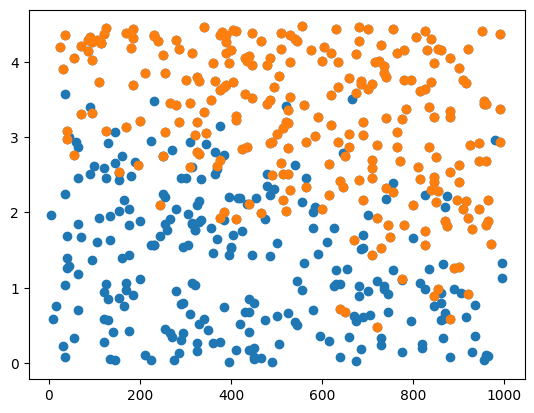

In [100]:
plt.plot(df.toeic,df.gpa,'o')
df_filtered = df[df.employment==1]
plt.plot(df_filtered.toeic,df_filtered.gpa,'o')

# 4. 분석 

## A. 데이터 정리 

In [101]:
X = pd.get_dummies(df[['toeic','gpa']])
y = df[['employment']]

In [102]:
X

toeic       gpa
0      135  0.051535
1      935  0.355496
2      485  2.228435
3       65  1.179701
4      445  3.962356
..     ...       ...
495    280  4.288465
496    310  2.601212
497    225  0.042323
498    320  1.041416
499    375  3.626883

[500 rows x 2 columns]

## B. Predictor ($\star\star\star$)

`-` 여기가 중요함. $y$가 연속형이 아니라 범주형으로 이루어진 경우는 `sklearn.linear_model.LogisticRegression()` 이용하여 predictor를 만들 것

In [104]:
predictr = sklearn.linear_model.LogisticRegression()

## C. 학습

In [105]:
predictr.fit(X,y)

/home/cgb2/anaconda3/envs/r/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

## D. 예측 

In [107]:
predictr.predict(X) 

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,

## E. 평가 

In [112]:
predictr.score(X,y)

0.882

In [122]:
(predictr.predict(X) == y.employment).mean()

0.882

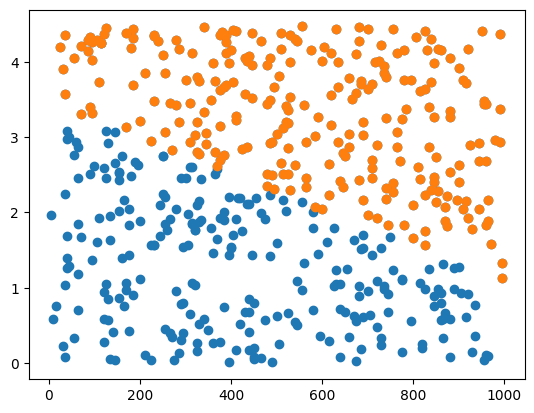

In [115]:
plt.plot(df.toeic,df.gpa,'o')
df_filtered = df[predictr.predict(X)==1]
plt.plot(df_filtered.toeic,df_filtered.gpa,'o') 

- 이 정도면 합리적임